## Gradient Descent

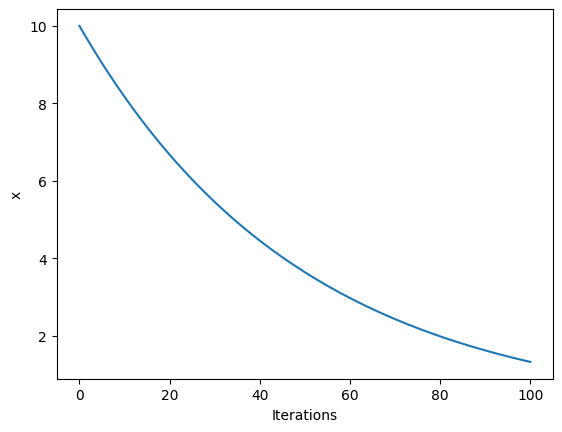

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

def squared_func(x: float) -> float:
    return x**2 

def derivative_of_squared_func(x: float) -> float:
    return 2 * x

eta = 0.01
x = 10
iterations = 100
x_vals = [x]
for t in range(iterations):
    derivative_of_f_x = derivative_of_squared_func(x)
    x -= eta * derivative_of_f_x
    x_vals.append(x)


plt.plot(np.arange(iterations+1), x_vals)
plt.xlabel("Iterations")
plt.ylabel("x")
plt.show() 

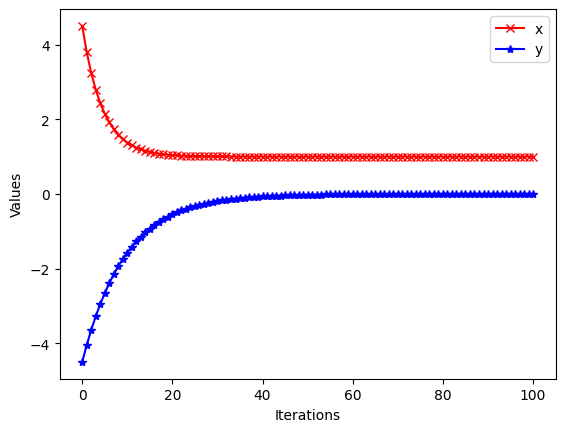

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def func(x: float, y: float) -> float:
    return (x - 1)**2 + 0.5 * y**2

def grad_func(x: float, y: float) -> Tuple[float, float]:
    return 2 * (x - 1), y

def sgd(eta: float, iterations: int, x_init: float, y_init: float) -> Tuple[List[float], List[float]]:
    x, y = x_init, y_init
    x_vals, y_vals = [x], [y]

    for _ in range(iterations):
        grad_x, grad_y = grad_func(x, y)
        x -= eta * grad_x
        y -= eta * grad_y
        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals

eta = 0.1
iterations = 100
x_init, y_init = 4.5, -4.5

x_vals, y_vals = sgd(eta, iterations, x_init, y_init)

plt.plot(np.arange(iterations+1), x_vals, color="red", marker="x")
plt.plot(np.arange(iterations+1), y_vals, color="blue", marker="*")
plt.legend(["x", "y"])
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.show()


#### Numerical methods

In [3]:
def f(x):
    return x**2

x = 2
delta_x = 1e-2
derivative_of_squared_x = (f(x + delta_x) - f(x)) / delta_x
print(derivative_of_squared_x)

4.009999999999891


#### Autodiff Torch 

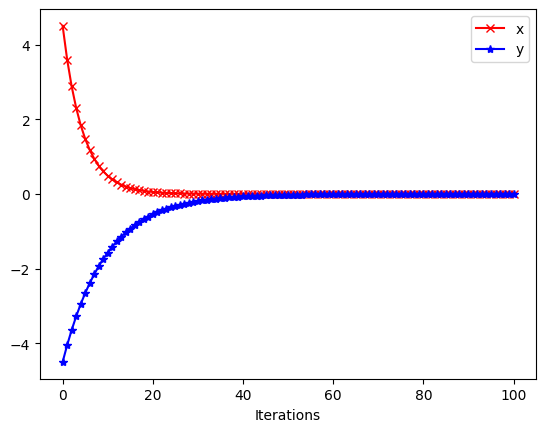

In [4]:
import torch 
import matplotlib.pyplot as plt 
import numpy as np 

num_iterations = 100
eta = 0.1
def f(x, y):
    return x**2 + 0.5*(y**2)

x = torch.tensor(4.5, requires_grad=True)
y = torch.tensor(-4.5, requires_grad=True)

x_values = [x.item()]
y_values = [y.item()]

for t in range(num_iterations):

    loss = f(x,y)
    loss.backward()

    with torch.no_grad():
        x -= eta * x.grad
        y -= eta * y.grad

    x_values.append(x.item())
    y_values.append(y.item())

    x.grad.zero_()
    y.grad.zero_()
        
plt.plot(np.arange(num_iterations+1), x_values, color="red", marker="x")
plt.plot(np.arange(num_iterations+1), y_values, color="blue", marker="*")
plt.legend(["x", "y"])
plt.xlabel("Iterations")
plt.show() 


## Momentum and Nestrov Accelerated Gradient

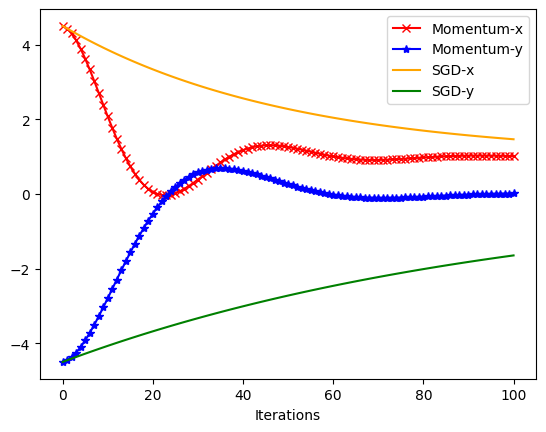

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def func(x: float, y: float) -> float:
    return (x - 1)**2 + 0.5 * y**2

def grad_func(x: float, y: float) -> Tuple[float, float]:
    return 2*(x - 1), y

def momentum(eta: float, num_iterations: int, x_init: float, y_init: float, beta: float=0.9) -> Tuple[List, List]:
    x, y = x_init, y_init
    v_x, v_y = 0.0, 0.0
    x_vals, y_vals = [x], [y]

    for _ in range(num_iterations):
        grad_x, grad_y = grad_func(x, y)
        v_x = beta * v_x + eta * grad_x
        v_y = beta * v_y + eta * grad_y
        x -= v_x
        y -= v_y
        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals

eta = 0.01
num_iterations = 100
x_init, y_init = 4.5, -4.5

x_m, y_m = momentum(eta, num_iterations, x_init, y_init)
x_s, y_s = sgd(eta, num_iterations, x_init, y_init)

plt.plot(np.arange(num_iterations+1), x_m, color="red", marker="x", label="Momentum-x")
plt.plot(np.arange(num_iterations+1), y_m, color="blue", marker="*", label="Momentum-y")
plt.plot(np.arange(num_iterations+1), x_s, color="orange", label="SGD-x")
plt.plot(np.arange(num_iterations+1), y_s, color="green", label="SGD-y")
plt.xlabel("Iterations")
plt.legend()
plt.show()


#### NAG

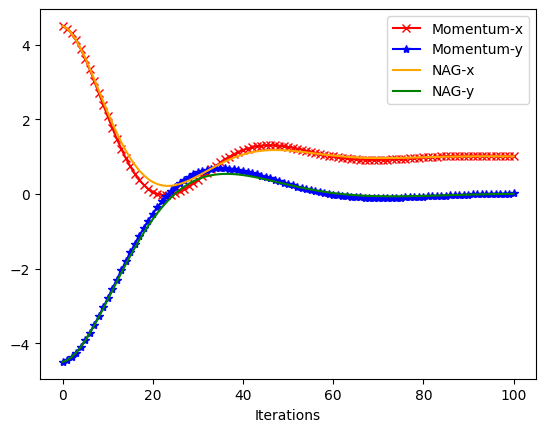

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def func(x: float, y: float) -> float:
    return (x - 1)**2 + 0.5 * y**2

def grad_func(x: float, y: float) -> Tuple[float, float]:
    return 2*(x - 1), y

def nag(eta: float, num_iterations: int, x_init: float, y_init: float, beta: float=0.9) -> Tuple[List, List]:
    x, y = x_init, y_init
    v_x, v_y = 0.0, 0.0
    x_vals, y_vals = [x], [y]

    for _ in range(num_iterations):
        # Lookahead
        lookahead_x = x - beta * v_x
        lookahead_y = y - beta * v_y

        grad_x, grad_y = grad_func(lookahead_x, lookahead_y)

        v_x = beta * v_x + eta * grad_x
        v_y = beta * v_y + eta * grad_y

        x -= v_x
        y -= v_y
        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals


eta = 0.01
num_iterations = 100
x_init, y_init = 4.5, -4.5


x_m, y_m = momentum(eta, num_iterations, x_init, y_init)
x_nag, y_nag = nag(eta, num_iterations, x_init, y_init)


plt.plot(np.arange(num_iterations+1), x_m, color="red", marker="x", label="Momentum-x")
plt.plot(np.arange(num_iterations+1), y_m, color="blue", marker="*", label="Momentum-y")
plt.plot(np.arange(num_iterations+1), x_nag, color="orange", label="NAG-x")
plt.plot(np.arange(num_iterations+1), y_nag, color="green", label="NAG-y")
plt.xlabel("Iterations")
plt.legend()
plt.show()



## Adaptive Gradient (Adagrad)

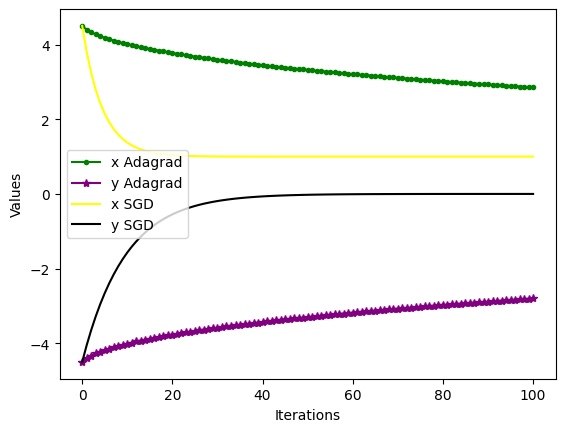

In [10]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

def func(x: float, y: float) -> float:
    return (x-1)**2 + 0.5 * y**2

def grad_func(x: float, y: float) -> Tuple[float, float]:
    return 2*(x-1), y

def adagrad(eta: float, num_iterations: int, x_init: float, y_init: float, eps: float=1e-8) -> Tuple[List, List]:
    x = x_init
    y = y_init

    h_x = 0
    h_y = 0

    x_vals = [x]
    y_vals = [y]

    for _ in range(num_iterations):
        grad_x, grad_y = grad_func(x, y)

        h_x += grad_x**2
        h_y += grad_y**2

        x -= eta * grad_x / (np.sqrt(h_x) + eps)
        y -= eta * grad_y / (np.sqrt(h_y) + eps)

        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals

eta = 0.1
num_iterations = 100
x_init = 4.5
y_init = -4.5

x_values_s, y_values_s = sgd(eta, num_iterations, x_init, y_init)
x_values_adagrad, y_values_adagrad = adagrad(eta, num_iterations, x_init, y_init)


plt.plot(np.arange(num_iterations+1), x_values_adagrad, color="green", marker=".", label="x Adagrad")
plt.plot(np.arange(num_iterations+1), y_values_adagrad, color="purple", marker="*", label="y Adagrad")
plt.plot(np.arange(num_iterations+1), x_values_s, color="yellow", label="x SGD")
plt.plot(np.arange(num_iterations+1), y_values_s, color="black", label="y SGD")
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend()
plt.show()


## Root Mean Squared Propagation (RMSProp)

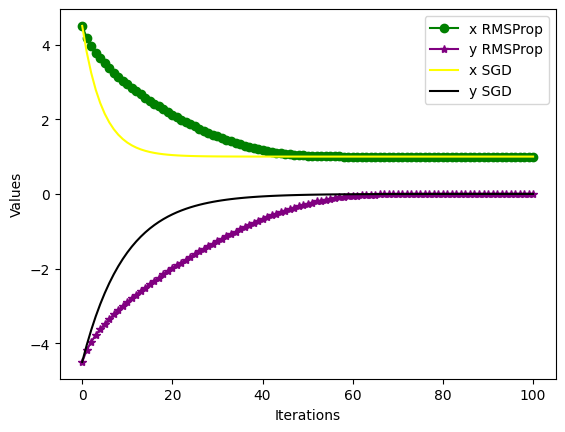

In [13]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

def func(x: float, y: float) -> float:
    return (x-1)**2 + 0.5 * y**2

def grad_func(x: float, y: float) -> Tuple[float, float]:
    return 2*(x-1), y

def rmsprop(eta: float, num_iterations: int, x_init: float, y_init: float, beta: float=0.9, eps: float=1e-8) -> Tuple[List, List]:
    x = x_init
    y = y_init

    s_x = 0
    s_y = 0

    x_vals = [x]
    y_vals = [y]

    for _ in range(num_iterations):
        grad_x, grad_y = grad_func(x, y)

        s_x = beta * s_x + (1 - beta) * grad_x**2
        s_y = beta * s_y + (1 - beta) * grad_y**2

        x -= eta * grad_x / (np.sqrt(s_x) + eps)
        y -= eta * grad_y / (np.sqrt(s_y) + eps)

        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals

eta = 0.1
num_iterations = 100
x_init = 4.5
y_init = -4.5

x_values_rms, y_values_rms = rmsprop(eta, num_iterations, x_init, y_init)
x_values_s, y_values_s = sgd(eta, num_iterations, x_init, y_init)

plt.plot(np.arange(num_iterations+1), x_values_rms, color="green", marker="o", label="x RMSProp")
plt.plot(np.arange(num_iterations+1), y_values_rms, color="purple", marker="*", label="y RMSProp")
plt.plot(np.arange(num_iterations+1), x_values_s, color="yellow", label="x SGD")
plt.plot(np.arange(num_iterations+1), y_values_s, color="black", label="y SGD")
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend()
plt.show()


## Adaptive Delta (Adadelta)

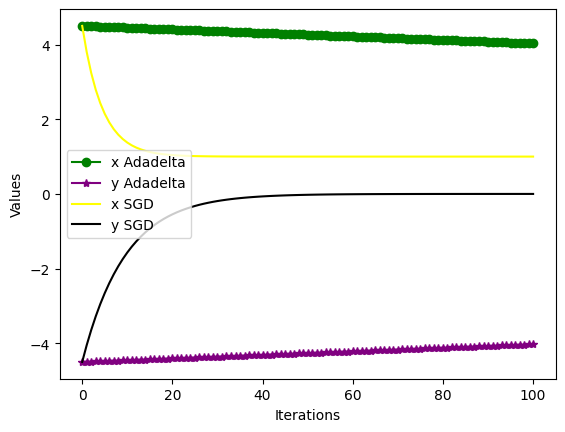

In [14]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

def func(x: float, y: float) -> float:
    return (x-1)**2 + 0.5 * y**2

def grad_func(x: float, y: float) -> Tuple[float, float]:
    return 2*(x-1), y

def adadelta(num_iterations: int, x_init: float, y_init: float, beta: float=0.95, eps: float=1e-6) -> Tuple[List, List]:
    x = x_init
    y = y_init

    s_x = 0
    s_y = 0

    delta_x_sq = 0
    delta_y_sq = 0

    x_vals = [x]
    y_vals = [y]

    for _ in range(num_iterations):
        grad_x, grad_y = grad_func(x, y)

        s_x = beta * s_x + (1 - beta) * grad_x**2
        s_y = beta * s_y + (1 - beta) * grad_y**2

        delta_x = - np.sqrt(delta_x_sq + eps) / np.sqrt(s_x + eps) * grad_x
        delta_y = - np.sqrt(delta_y_sq + eps) / np.sqrt(s_y + eps) * grad_y

        x += delta_x
        y += delta_y

        delta_x_sq = beta * delta_x_sq + (1 - beta) * delta_x**2
        delta_y_sq = beta * delta_y_sq + (1 - beta) * delta_y**2

        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals

num_iterations = 100
x_init = 4.5
y_init = -4.5

x_values_adadelta, y_values_adadelta = adadelta(num_iterations, x_init, y_init)
x_values_s, y_values_s = sgd(eta, num_iterations, x_init, y_init)

plt.plot(np.arange(num_iterations+1), x_values_adadelta, color="green", marker="o", label="x Adadelta")
plt.plot(np.arange(num_iterations+1), y_values_adadelta, color="purple", marker="*", label="y Adadelta")
plt.plot(np.arange(num_iterations+1), x_values_s, color="yellow", label="x SGD")
plt.plot(np.arange(num_iterations+1), y_values_s, color="black", label="y SGD")
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend()
plt.show()


## Adaptive Moment Estimation (Adam)

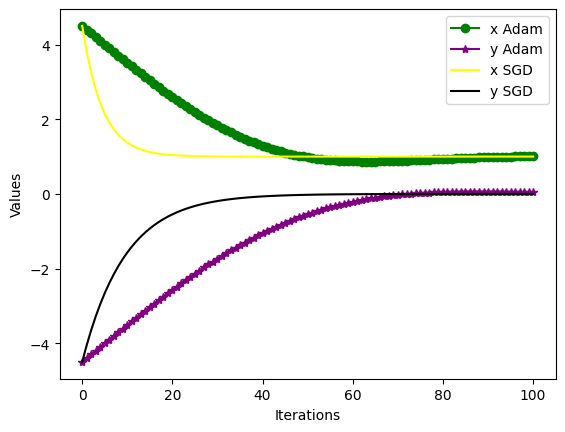

In [15]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

def func(x: float, y: float) -> float:
    return (x-1)**2 + 0.5 * y**2

def grad_func(x: float, y: float) -> Tuple[float, float]:
    return 2*(x-1), y

def adam(eta: float, num_iterations: int, x_init: float, y_init: float, beta1: float=0.9, beta2: float=0.999, eps: float=1e-8) -> Tuple[List, List]:
    x = x_init
    y = y_init

    m_x = 0
    m_y = 0

    v_x = 0
    v_y = 0

    x_vals = [x]
    y_vals = [y]

    for t in range(1, num_iterations+1):
        grad_x, grad_y = grad_func(x, y)

        m_x = beta1 * m_x + (1 - beta1) * grad_x
        m_y = beta1 * m_y + (1 - beta1) * grad_y

        v_x = beta2 * v_x + (1 - beta2) * grad_x**2
        v_y = beta2 * v_y + (1 - beta2) * grad_y**2

        m_x_hat = m_x / (1 - beta1**t)
        m_y_hat = m_y / (1 - beta1**t)
        v_x_hat = v_x / (1 - beta2**t)
        v_y_hat = v_y / (1 - beta2**t)

        x -= eta * m_x_hat / (np.sqrt(v_x_hat) + eps)
        y -= eta * m_y_hat / (np.sqrt(v_y_hat) + eps)

        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals

eta = 0.1
num_iterations = 100
x_init = 4.5
y_init = -4.5

x_values_adam, y_values_adam = adam(eta, num_iterations, x_init, y_init)
x_values_s, y_values_s = sgd(eta, num_iterations, x_init, y_init)

plt.plot(np.arange(num_iterations+1), x_values_adam, color="green", marker="o", label="x Adam")
plt.plot(np.arange(num_iterations+1), y_values_adam, color="purple", marker="*", label="y Adam")
plt.plot(np.arange(num_iterations+1), x_values_s, color="yellow", label="x SGD")
plt.plot(np.arange(num_iterations+1), y_values_s, color="black", label="y SGD")
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend()
plt.show()


## Adam with Decoupled Weight Decay (AdamW)

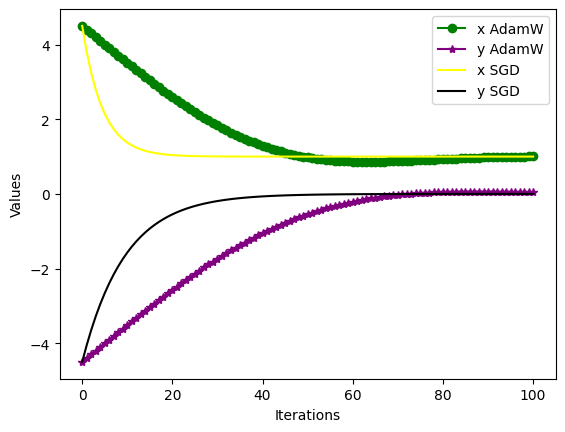

In [16]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

def func(x: float, y: float) -> float:
    return (x-1)**2 + 0.5 * y**2

def grad_func(x: float, y: float) -> Tuple[float, float]:
    return 2*(x-1), y

def adamw(eta: float, num_iterations: int, x_init: float, y_init: float,
          beta1: float=0.9, beta2: float=0.999, eps: float=1e-8, weight_decay: float=0.01) -> Tuple[List, List]:
    
    x = x_init
    y = y_init

    m_x = 0
    m_y = 0

    v_x = 0
    v_y = 0

    x_vals = [x]
    y_vals = [y]

    for t in range(1, num_iterations+1):
        grad_x, grad_y = grad_func(x, y)

        grad_x += weight_decay * x
        grad_y += weight_decay * y

        m_x = beta1 * m_x + (1 - beta1) * grad_x
        m_y = beta1 * m_y + (1 - beta1) * grad_y

        v_x = beta2 * v_x + (1 - beta2) * grad_x**2
        v_y = beta2 * v_y + (1 - beta2) * grad_y**2

        m_x_hat = m_x / (1 - beta1**t)
        m_y_hat = m_y / (1 - beta1**t)
        v_x_hat = v_x / (1 - beta2**t)
        v_y_hat = v_y / (1 - beta2**t)

        x -= eta * m_x_hat / (np.sqrt(v_x_hat) + eps)
        y -= eta * m_y_hat / (np.sqrt(v_y_hat) + eps)

        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals

eta = 0.1
num_iterations = 100
x_init = 4.5
y_init = -4.5

x_values_adamw, y_values_adamw = adamw(eta, num_iterations, x_init, y_init)
x_values_s, y_values_s = sgd(eta, num_iterations, x_init, y_init)

plt.plot(np.arange(num_iterations+1), x_values_adamw, color="green", marker="o", label="x AdamW")
plt.plot(np.arange(num_iterations+1), y_values_adamw, color="purple", marker="*", label="y AdamW")
plt.plot(np.arange(num_iterations+1), x_values_s, color="yellow", label="x SGD")
plt.plot(np.arange(num_iterations+1), y_values_s, color="black", label="y SGD")
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend()
plt.show()


## Optimizer Class

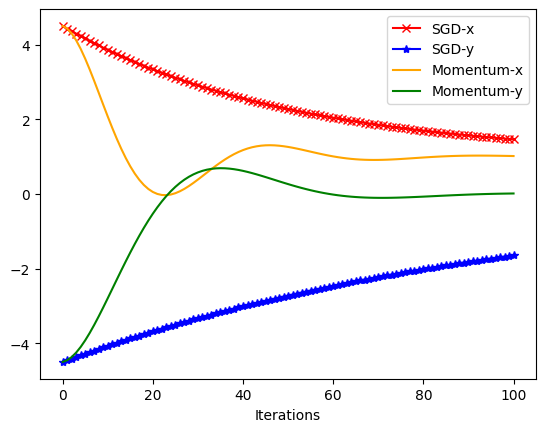

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from typing import List, Tuple

class Optimizer(ABC):
    def __init__(self, eta: float, num_iterations: int):
        self.eta = eta
        self.num_iterations = num_iterations

    @abstractmethod
    def step(self, x: float, y: float) -> Tuple[float, float]:
        pass

    @abstractmethod
    def reset(self):
        pass

    def optimize(self, x_init: float, y_init: float) -> Tuple[List[float], List[float]]:
        self.reset()
        x, y = x_init, y_init
        x_vals, y_vals = [x], [y]

        for _ in range(self.num_iterations):
            x, y = self.step(x, y)
            x_vals.append(x)
            y_vals.append(y)

        return x_vals, y_vals

class SGD(Optimizer):
    def step(self, x: float, y: float) -> Tuple[float, float]:
        grad_x, grad_y = grad_func(x, y)
        x -= self.eta * grad_x
        y -= self.eta * grad_y
        return x, y

    def reset(self):
        pass  

class Momentum(Optimizer):
    def __init__(self, eta: float, num_iterations: int, beta: float = 0.9):
        super().__init__(eta, num_iterations)
        self.beta = beta

    def reset(self):
        self.v_x, self.v_y = 0.0, 0.0

    def step(self, x: float, y: float) -> Tuple[float, float]:
        grad_x, grad_y = grad_func(x, y)
        self.v_x = self.beta * self.v_x + self.eta * grad_x
        self.v_y = self.beta * self.v_y + self.eta * grad_y
        x -= self.v_x
        y -= self.v_y
        return x, y

eta = 0.01
num_iterations = 100
x_init, y_init = 4.5, -4.5

sgd = SGD(eta, num_iterations)
momentum = Momentum(eta, num_iterations)

x_sgd, y_sgd = sgd.optimize(x_init, y_init)
x_mom, y_mom = momentum.optimize(x_init, y_init)

plt.plot(np.arange(num_iterations+1), x_sgd, color="red", marker="x", label="SGD-x")
plt.plot(np.arange(num_iterations+1), y_sgd, color="blue", marker="*", label="SGD-y")
plt.plot(np.arange(num_iterations+1), x_mom, color="orange", label="Momentum-x")
plt.plot(np.arange(num_iterations+1), y_mom, color="green", label="Momentum-y")
plt.xlabel("Iterations")
plt.legend()
plt.show()

